In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# **Data**

In [3]:
df=pd.read_csv("/content/SampleSuperstore.csv")
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [4]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# **Goegraphical analysis.**


In [7]:
def value(a):
  ans=df[a].value_counts()
  return ans

**Store operates only in USA.**

In [8]:
Coans=value("Country")
print(Coans)

United States    9994
Name: Country, dtype: int64


**There are 49 states in which the store operates, with California and Newyork as top 2**

**California, New York,Washington are generating huge profits , where as there 9 states which are into losses. After Maryland , the following states have very less profits. These are the states we need to look into .**

In [9]:
# Stateans=value("State")
# print(Stateans)

df["State"].nunique()

49

In [10]:
df.groupby('State')['Profit'].mean()

State
Alabama                  94.865989
Arizona                 -15.303235
Arkansas                 66.811452
California               38.171608
Colorado                -35.867351
Connecticut              42.823071
Delaware                103.930988
District of Columbia    105.958930
Florida                  -8.875461
Georgia                  88.315453
Idaho                    39.367767
Illinois                -25.625787
Indiana                 123.375411
Iowa                     39.460397
Kansas                   34.851813
Kentucky                 80.573357
Louisiana                52.288150
Maine                    56.810775
Maryland                 66.963608
Massachusetts            50.262975
Michigan                 95.934069
Minnesota               121.608847
Mississippi              59.867475
Missouri                 97.518341
Montana                 122.221900
Nebraska                 53.607742
Nevada                   85.045279
New Hampshire            63.203807
New Jersey    

In [11]:
fig = px.histogram(df, x="State", y="Profit",height=400)
fig.show()

In [12]:
fig = px.histogram(df, x="State", y="Quantity",height=400)
fig.show()

# **Region wise analysis **

**After analyzing region wise , we come to conclusion that the central and south regions are weak regions which needs to be focused on. Whereas we hsve good profits in west and east regions.**

In [13]:
fig = px.pie(df, values='Profit', names='Region')
fig.show()

In [14]:
rans=value("Region")
print(rans)

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64


In [15]:
df["Quantity"].sum()

37873

In [16]:
df.groupby("Region").sum()["Quantity"]

<ipython-input-16-054d421becdd>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Region
Central     8780
East       10618
South       6209
West       12266
Name: Quantity, dtype: int64

In [17]:
import plotly.express as px
fig = px.histogram(df, x="Region", y="Quantity",height=400)
fig.show()

In [18]:
df["Sales"].sum()

2297200.8603000003

**2 regions where sales are less are south and central.**

In [19]:
df.groupby("Region").sum()["Sales"]

<ipython-input-19-8183ee888399>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

In [20]:
import plotly.express as px
fig = px.histogram(df, x="Region", y="Sales",height=400)
fig.show()

In [21]:
df["Profit"].sum()

286397.0217

In [22]:
df.groupby("Region").sum()["Profit"]

<ipython-input-22-33c3006fe378>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64

**As sales are less in Central and south , profits are also less.**

In [23]:
import plotly.express as px
fig = px.histogram(df, x="Region", y="Profit",height=400)
fig.show()

# **Discounts**

**We can see 60,80,50 percent discounts are given in central region, we need to reduce the discounts in order to generate more profits.**


In [24]:
import plotly.express as px
fig = px.bar(df, x="Region", y="Profit", color="Discount", title="Discounts per region")
fig.show()

In [25]:
pd.crosstab(df["Region"],df["Discount"])

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Region,,,,,,,,,,,,
Central,828,18,0,834,147,27,13,0,18,138,0,300
East,1449,76,0,862,80,0,177,0,18,0,186,0
South,805,0,0,644,0,0,16,11,12,0,132,0
West,1716,0,52,1317,0,0,0,0,18,0,100,0


# **Category and Subcategory**

**There's a lot less sale of furnitures. Tables,Bookcases are into losses.Either reduce discount on them if any or stop its production  or can do marketing campaigns to boost up its sale.**

**In office supplies , fasteners and supplies also are on verge of losses with a mere profit.**

In [26]:
Categoryans=value("Category")
print(Categoryans)

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64


In [27]:
fig=px.scatter(df,x="Sales",y="Profit",color="Category",hover_data=["Region"])
fig.show()

In [28]:
Scans=value("Sub-Category")
print(Scans)

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


In [29]:
pd.crosstab(df["Category"],df["Sub-Category"])

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Category,,,,,,,,,,,,,,,,,
Furniture,0,0,0,0,228,617,0,0,0,957,0,0,0,0,0,0,319
Office Supplies,0,466,796,1523,0,0,0,254,217,0,364,0,1370,0,846,190,0
Technology,775,0,0,0,0,0,68,0,0,0,0,115,0,889,0,0,0


In [43]:
dft = df.query("Category == 'Technology'")
fig = px.bar(dft, x='State', y='Profit', height=400)
fig.show()

In [30]:
import plotly.express as px
fig = px.histogram(df, x="Category", y="Profit",height=400)
fig.show()

In [ ]:
fig = px.histogram(df, x="Category", y="Profit",height=400)
fig.show()

In [31]:
import plotly.express as px
fig = px.histogram(df, x="Sub-Category", y="Profit",height=400)
fig.show()

In [32]:
fig = px.histogram(df, x="Region", y="Profit",color="Category",height=400)
fig.show()


In [33]:
fig = px.histogram(df, x="Region", y="Profit",color="Sub-Category",height=400)
fig.show()

# **Segment Wise analysis**

Technology is our most profitable category and as it constitutes a less number in Home office , its least profitable segment. 

Furniture is less in profits ans least in demand by our target segments.Also some furniture are facing losses.

In [34]:
SEans=value("Segment")
print(SEans)

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64


In [35]:
pd.crosstab(df["Segment"],df["Category"])

Category,Furniture,Office Supplies,Technology
Segment,,,
Consumer,1113,3127,951
Corporate,646,1820,554
Home Office,362,1079,342


In [36]:
fig = px.pie(df, values='Profit', names='Segment')
fig.show()

In [37]:
fig = px.histogram(df, x="Segment", y="Profit",color="Category",height=400)
fig.show()

# **Ship mode**

In [38]:
Sans=value("Ship Mode")
print(Sans)

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64


<Axes: ylabel='Ship Mode'>

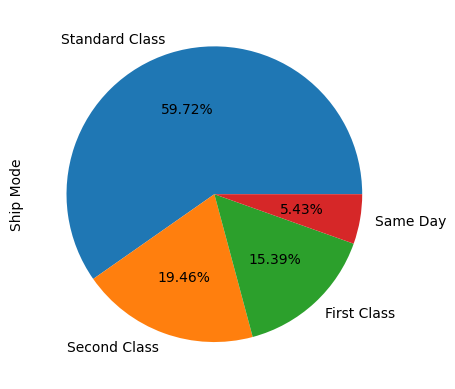

In [39]:
df["Ship Mode"].value_counts().plot(kind="pie",autopct="%1.2f%%")